### Look at averaged similarity of pairs of features compared to a shuffle

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.visualization_utils as visualization_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
import utils.classifier_utils as classifier_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
from constants.behavioral_constants import *
from constants.decoding_constants import *
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io
import itertools

import argparse
import copy
from tqdm import tqdm
import seaborn as sns

In [4]:
PAIRS_PATH = "/data/patrick_res/sessions/both/pairs_at_least_3blocks_10sess.pickle"

args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.subject = "both"
args.base_output_path = "/data/patrick_res/belief_similarities"
# TODO: remove
args.sig_unit_level = "pref_conf_99th_window_filter_drift"
args.relative_to_low = True
args.sim_type = "cosine_sim"

pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
all_data = belief_partitions_io.read_all_similarities(args, pairs)
all_data = all_data[all_data.Time <= 0]

In [5]:
all_data

,PseudoTrialNumber,TimeIdx,cosine_sim,dim_type,pair_str,Time,type
0,0,-10,0.484399,within dim,CIRCLE_SQUARE,-1.0,true
1,0,-9,0.543730,within dim,CIRCLE_SQUARE,-0.9,true
2,0,-8,0.553899,within dim,CIRCLE_SQUARE,-0.8,true
3,0,-7,0.471865,within dim,CIRCLE_SQUARE,-0.7,true
4,0,-6,0.427477,within dim,CIRCLE_SQUARE,-0.6,true
...,...,...,...,...,...,...,...
615986,999,-4,0.172428,within dim,POLKADOT_SWIRL,-0.4,shuffle
615987,999,-3,0.170857,within dim,POLKADOT_SWIRL,-0.3,shuffle
615988,999,-2,0.292426,within dim,POLKADOT_SWIRL,-0.2,shuffle
615989,999,-1,0.440943,within dim,POLKADOT_SWIRL,-0.1,shuffle


100%|██████████| 1000/1000 [00:04<00:00, 238.64it/s]


{'true': (0, 0.3893931337715349), 'shuffle': (1, 0.374808081432056)}
0.38939313377153495
0.01946965668857675


100%|██████████| 1000/1000 [00:29<00:00, 33.61it/s]

0
1
text y pos: 0.41080975612896936


Text(16.765625000000007, 0.5, 'Cosine Sim')

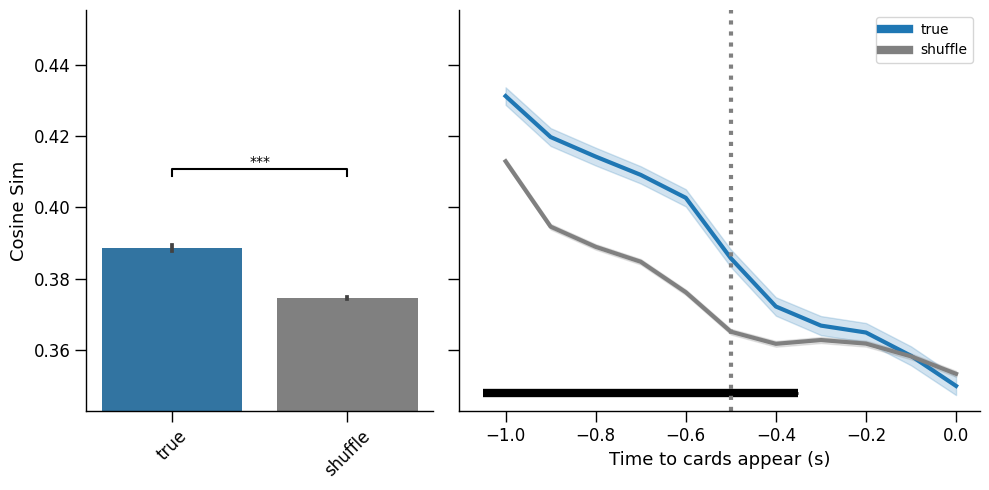

In [8]:
color_map = {
    "true": "tab:blue",
    "shuffle": "grey",
}
sig_pairs = [("true", "shuffle", "black")]
fig, (ax1, ax2) = visualization_utils.visualize_bars_time(
    args, all_data, y_col="cosine_sim", hue_col="type", 
    display_map=None, color_map=color_map, 
    y_lims=(all_data.groupby("TimeIdx").cosine_sim.mean().min(), None),
    sig_pairs=sig_pairs
)
ax1.set_ylabel("Cosine Sim")

<Axes: xlabel='TimeIdx', ylabel='cosine_sim'>

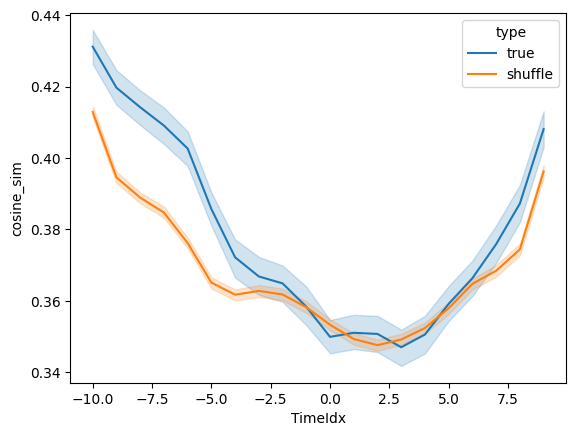

In [5]:
fig, ax = plt.subplots()
sns.lineplot(all_data, x="TimeIdx", y="cosine_sim", hue="type", ax=ax)


### by dim scrap

Text(42.222222222222214, 0.5, 'sim(within) - sim(across)')

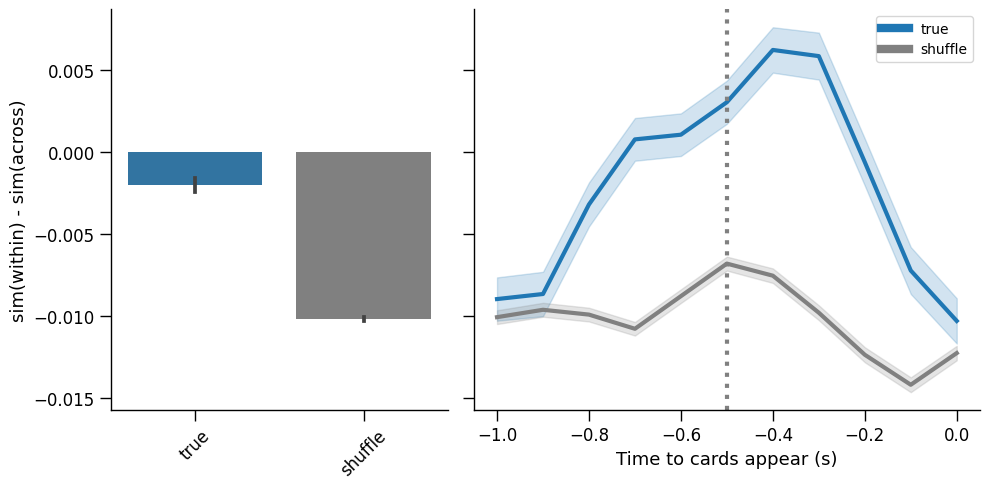

In [10]:
pairs = pd.read_pickle(PAIRS_PATH).reset_index(drop=True)
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.relative_to_low = True
args.sim_type = "cosine_sim"
args.subject = "both"
args.base_output_path = "/data/patrick_res/belief_similarities"
# TODO: remove
args.sig_unit_level = "pref_conf_99th_window_filter_drift"
# args.region_level = None if region is None else "structure_level2_cleaned"
args.regions = None

all_data = belief_partitions_io.read_all_similarities(args, pairs)
all_data = all_data[all_data.Time <= 0]
within_data = all_data[all_data.dim_type == "within dim"]
across_data = all_data[all_data.dim_type == "across dim"]

crossed = pd.merge(within_data, across_data, on=["PseudoTrialNumber", "TimeIdx", "type"], suffixes=["_within", "_across"])
crossed["sim_diff"] = crossed["cosine_sim_within"] - crossed["cosine_sim_across"]
crossed["Time"] = crossed["TimeIdx"] / 10

color_map = {
    "true": "tab:blue",
    "shuffle": "grey",
}
# min = crossed.groupby(["TimeIdx", "type"]).sim_diff.mean().min()
fig, (ax1, ax2) = visualization_utils.visualize_bars_time(args, crossed, y_col="sim_diff", hue_col="type", display_map=None, color_map=color_map, y_lims=(None, None))
ax1.set_ylabel("sim(within) - sim(across)")

In [7]:
crossed

,PseudoTrialNumber,TimeIdx,cosine_sim_within,dim_type_within,pair_str_within,Time_within,type,cosine_sim_across,dim_type_across,pair_str_across,Time_across,sim_diff,Time
0,0,-10,0.484399,within dim,CIRCLE_SQUARE,-1.0,true,0.580232,across dim,CIRCLE_GREEN,-1.0,-0.095833,-1.0
1,0,-10,0.484399,within dim,CIRCLE_SQUARE,-1.0,true,0.453295,across dim,CIRCLE_MAGENTA,-1.0,0.031104,-1.0
2,0,-10,0.484399,within dim,CIRCLE_SQUARE,-1.0,true,0.618620,across dim,CIRCLE_YELLOW,-1.0,-0.134221,-1.0
3,0,-10,0.484399,within dim,CIRCLE_SQUARE,-1.0,true,0.645805,across dim,CIRCLE_RIPPLE,-1.0,-0.161406,-1.0
4,0,-10,0.484399,within dim,CIRCLE_SQUARE,-1.0,true,0.449376,across dim,SQUARE_CYAN,-1.0,0.035023,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323195,999,0,0.469536,within dim,POLKADOT_SWIRL,0.0,shuffle,0.152014,across dim,MAGENTA_ESCHER,0.0,0.317522,0.0
2323196,999,0,0.469536,within dim,POLKADOT_SWIRL,0.0,shuffle,0.366568,across dim,YELLOW_ESCHER,0.0,0.102968,0.0
2323197,999,0,0.469536,within dim,POLKADOT_SWIRL,0.0,shuffle,0.083702,across dim,YELLOW_POLKADOT,0.0,0.385834,0.0
2323198,999,0,0.469536,within dim,POLKADOT_SWIRL,0.0,shuffle,0.370892,across dim,YELLOW_RIPPLE,0.0,0.098644,0.0
